# ***Linear Regression with NN - PyTorch***

## *Creating a sample dataset for the experiment*

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

torch.__version__

'2.1.0+cu121'

In [ ]:
weight, bias = 0.7, 0.3 # weights and bias to create the sample dataset

# Create data
step = 0.02
X = torch.arange(0, 2, 0.02).unsqueeze(dim=1)
y = weight * X + bias

X = X + (torch.randn_like(X) * 0.02) # adding a randow noise to the data
y = y + (torch.randn_like(y) * 0.02)

print("X of dataset:\n", X[:5], X.shape)
print("Y of dataset:\n", y[:5], y.shape)

X of dataset:
 tensor([[0.0045],
        [0.0240],
        [0.0220],
        [0.0691],
        [0.0964]]) torch.Size([100, 1])
Y of dataset:
 tensor([[0.2980],
        [0.3188],
        [0.3599],
        [0.3291],
        [0.3456]]) torch.Size([100, 1])


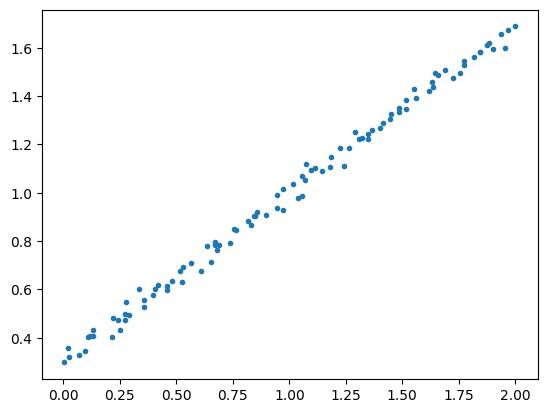

In [ ]:
plt.scatter(X, y, marker='.')  # 'o' for markers
plt.show()

## *Spliting the dataset into train and test with a ration*

In [ ]:
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

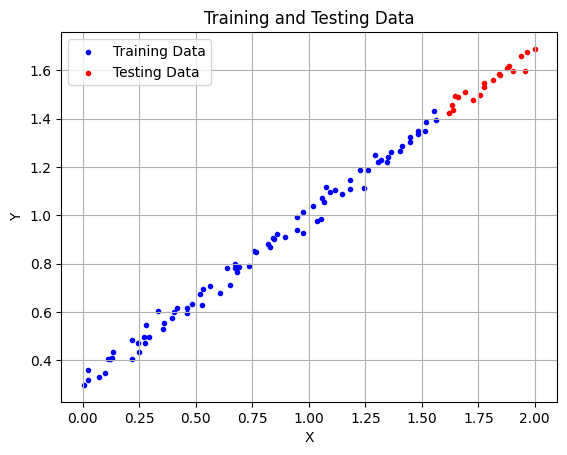

In [ ]:
plt.scatter(X_train, y_train, color='blue', label='Training Data', marker=".")
plt.scatter(X_test, y_test, color='red', label='Testing Data', marker=".")
plt.title('Training and Testing Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

## *Define the neural netwrok*

**torch.nn.Module** is designed to be subclassed to define custom neural network architectures. When you define a new neural network module in PyTorch, you typically inherit from **torch.nn.Module**.

We set `requires_grad=True` because we want to compute gradients of the weights and bias during the training process, which is essential for running the gradient descent algorithm.

* `nn.Module` contains the larger building blocks (layers)
* `nn.Parameter` contains the smaller parameters like weights and biases (put these together to make `nn.Module`(s))
* `forward()` tells the larger blocks how to make calculations on inputs (tensors full of data) within  `nn.Module`(s)
* `torch.optim` contains optimization methods on how to improve the parameters within `nn.Parameter` to better represent input data

In [ ]:
class LinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = torch.nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = torch.nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

* `torch.nn` : Contains all of the building blocks for computational graphs
* `torch.nn.Module` : The base class of the all the NN, all the building blocks for NN are contains here. If we want to NN, then we should subclass `nn.Module`.
* This contains various kind of optimization algorithms.


## *Create an instance of the model*

In [ ]:
model_linear = LinearRegressionModel()

In [ ]:
print(list(model_linear.parameters()), "\n")
print(model_linear.state_dict(), "\n")
print(model_linear.weights, "\n")

[Parameter containing:
tensor([-0.9178], requires_grad=True), Parameter containing:
tensor([1.6397], requires_grad=True)] 

OrderedDict([('weights', tensor([-0.9178])), ('bias', tensor([1.6397]))]) 

Parameter containing:
tensor([-0.9178], requires_grad=True) 



## *Making predictions with the model before the training process*

In [ ]:
with torch.inference_mode(): # inference_mode, tured off the gradient traking
    y_preds = model_linear(X_test)
y_preds.T

tensor([[ 0.1532,  0.1375,  0.1422,  0.1167,  0.1291,  0.0874,  0.0550,  0.0277,
          0.0110,  0.0121, -0.0537, -0.0275, -0.0517, -0.0812, -0.1059, -0.0891,
         -0.1542, -0.1396, -0.1650, -0.1961]])

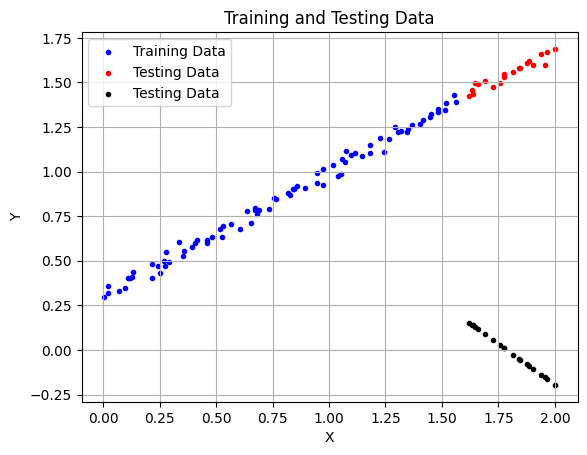

In [ ]:
plt.scatter(X_train, y_train, color='blue', label='Training Data', marker=".")
plt.scatter(X_test, y_test, color='red', label='Testing Data', marker=".")
plt.scatter(X_test, y_preds, color='black', label='Testing Data', marker=".")
plt.title('Training and Testing Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

## *Fit the model to the training dataset - Training the model*

***Define the error function - MSE (Mean square Error) & Optimizer***

In [ ]:
loss_func = torch.nn.MSELoss() # Meas Square Error Loss function
optimizer = torch.optim.SGD(model_linear.parameters(), lr=0.01) # stochastic gradient descent (SGD) optimization algorithm

#In stochastic gradient descent, only one training example is used to compute the gradient of the loss function with respect to the model parameters in each iteration.

***Training loop of the model***

In [ ]:
epochs = 3000 # number of times, the model will pass over the training data

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    model_linear.train()

    y_pred = model_linear(X_train) # forward propagation
    loss = loss_func(y_pred, y_train) # loss calculations
    optimizer.zero_grad() # gradient resets to zero in each epoch
    loss.backward() # backward propagation (move backward through the network to calculate the gradient of each parameters with respect to the loss)
    optimizer.step() # update paramterrs to reduce the loss

    model_linear.eval()
    with torch.no_grad():
        test_pred = model_linear(X_test)
        test_loss = loss_func(test_pred, y_test.type(torch.float))

        if epoch % 100 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")


Epoch: 0 | MAE Train Loss: 0.5593087673187256 | MAE Test Loss: 2.441091775894165 
Epoch: 100 | MAE Train Loss: 0.33224982023239136 | MAE Test Loss: 1.1968376636505127 
Epoch: 200 | MAE Train Loss: 0.2021147906780243 | MAE Test Loss: 0.7172712087631226 
Epoch: 300 | MAE Train Loss: 0.12307147681713104 | MAE Test Loss: 0.43302005529403687 
Epoch: 400 | MAE Train Loss: 0.07505647093057632 | MAE Test Loss: 0.2611176073551178 
Epoch: 500 | MAE Train Loss: 0.045889656990766525 | MAE Test Loss: 0.15717801451683044 
Epoch: 600 | MAE Train Loss: 0.028172224760055542 | MAE Test Loss: 0.09441335499286652 
Epoch: 700 | MAE Train Loss: 0.017409730702638626 | MAE Test Loss: 0.056577909737825394 
Epoch: 800 | MAE Train Loss: 0.010872024111449718 | MAE Test Loss: 0.033821724355220795 
Epoch: 900 | MAE Train Loss: 0.006900680251419544 | MAE Test Loss: 0.02017516829073429 
Epoch: 1000 | MAE Train Loss: 0.00448827538639307 | MAE Test Loss: 0.012023375369608402 
Epoch: 1100 | MAE Train Loss: 0.00302287377

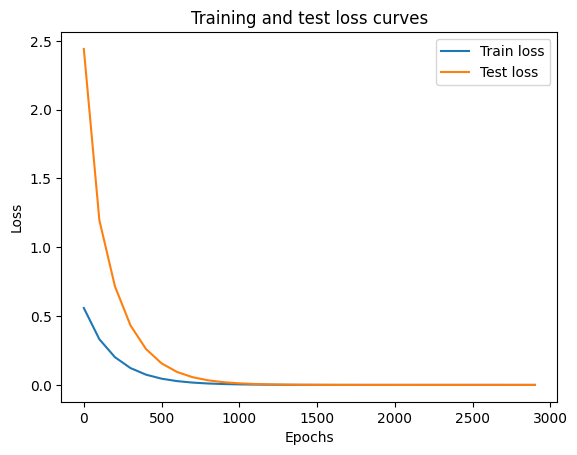

In [ ]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

***Make predictions with the trained model***

In [ ]:
with torch.inference_mode(): # inference_mode, tured off the gradient traking
    y_preds = model_linear(X_test)
y_preds.T

tensor([[1.4348, 1.4467, 1.4432, 1.4626, 1.4531, 1.4848, 1.5094, 1.5302, 1.5429,
         1.5420, 1.5920, 1.5721, 1.5905, 1.6128, 1.6316, 1.6188, 1.6683, 1.6572,
         1.6765, 1.7001]])

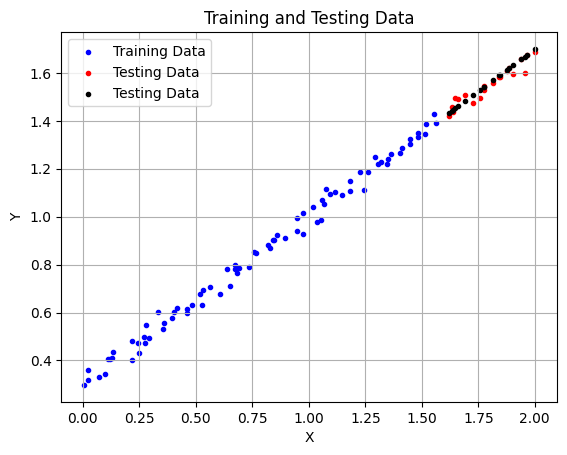

In [ ]:
plt.scatter(X_train, y_train, color='blue', label='Training Data', marker=".")
plt.scatter(X_test, y_test, color='red', label='Testing Data', marker=".")
plt.scatter(X_test, y_preds, color='black', label='Testing Data', marker=".")
plt.title('Training and Testing Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

***Weights and bias of the model after the training process***

In [ ]:
print(list(model_linear.parameters()), "\n")
print(model_linear.state_dict(), "\n")
print(model_linear.weights, "\n")

[Parameter containing:
tensor([0.6971], requires_grad=True), Parameter containing:
tensor([0.3058], requires_grad=True)] 

OrderedDict([('weights', tensor([0.6971])), ('bias', tensor([0.3058]))]) 

Parameter containing:
tensor([0.6971], requires_grad=True) 



## **Rebuild using PyTorch `nn.Linear()` function**
In this way, we do not have to define each paramters(weights and bias) seperatly.

In [ ]:
class LinearRegressionModel_V2torch(torch.nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = torch.nn.Linear(in_features=1,
                                      out_features=1)

    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)